# Some Examples and Tests

In [1]:
from dataclasses import dataclass
from typing import Self, Iterable, Generator, TypeVar
from enum import StrEnum, auto
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib import pyplot as plt

from importlib import reload

import tuftestyledgraphs

%matplotlib inline
%reload_ext watermark
%watermark
%watermark -iv

Last updated: 2023-03-12T23:51:00.152241+01:00

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.11.0

Compiler    : Clang 14.0.0 (clang-1400.0.29.202)
OS          : Darwin
Release     : 22.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pandas           : 1.5.3
tuftestyledgraphs: 0.0.0.post3.dev0+7bd5e9d
numpy            : 1.24.2
matplotlib       : 3.7.1



In [2]:
def print_p(q: ...) -> None:
    print(f"Settable properties on: {q} / {type(q)}")
    print(plt.setp(q))

In [3]:
data = {
    'Barton LLC': 109438.50,
    'Frami, Hills and Schmidt': 103569.59,
    'Fritsch, Russel and Anderson': 112214.71,
    'Jerde-Hilpert': 112591.43,
    'Keeling LLC': 100934.30,
    'Koepp Ltd': 103660.54,
    'Kulas Inc': 137351.96,
    'Trantow-Barrows': 123381.38,
    'White-Trantow': 135841.99,
    'Will LLC': 104437.60
}

data = {i: data[i] for i in sorted(data, key=lambda x: x[1])}

group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)
group_max = np.max(group_data)

rel_to = group_mean / 100
group_ratio = group_data / rel_to

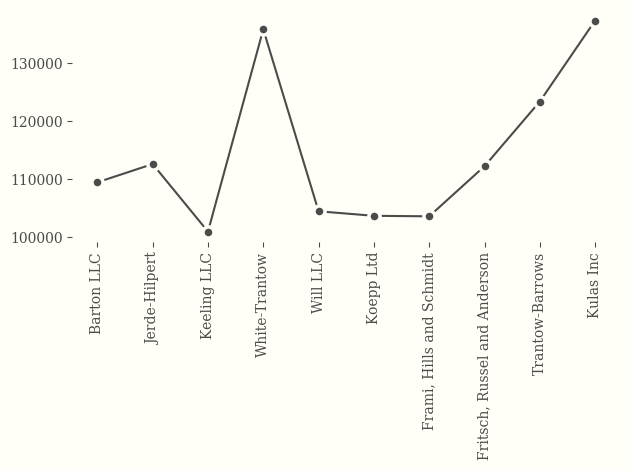

In [4]:
reload(tuftestyledgraphs)

g = (
    tuftestyledgraphs.LineGraph()
     .add(group_names, group_data)
     .rotate_xlabels()
     # .show_values(fmt="{:.1f}")
     .draw()
)

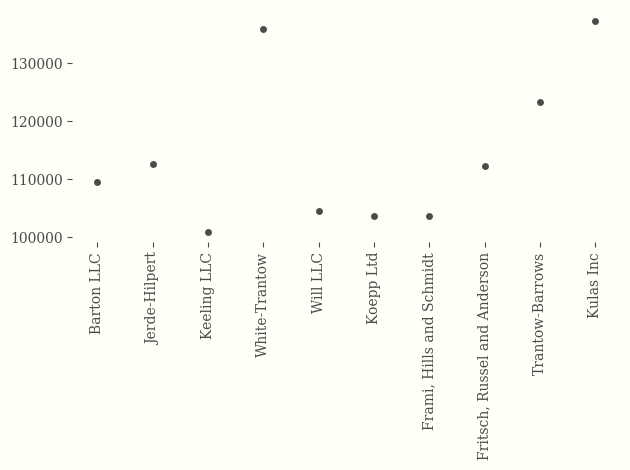

In [4]:
reload(tuftestyledgraphs)

g = (
    tuftestyledgraphs.ScatterGraph()
     .add(group_names, group_data)
     .rotate_xlabels()
     # .show_values(fmt="{:.1f}")
     .draw()
)

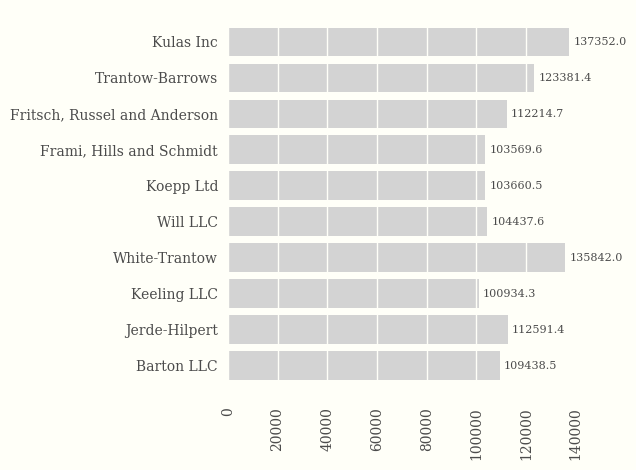

In [5]:
reload(tuftestyledgraphs)

g = (
    tuftestyledgraphs.HorizontalBarGraph()
     .add(group_names, group_data)
     .rotate_xlabels()
     .show_values(fmt="{:.1f}")
     .draw()
    )
del g

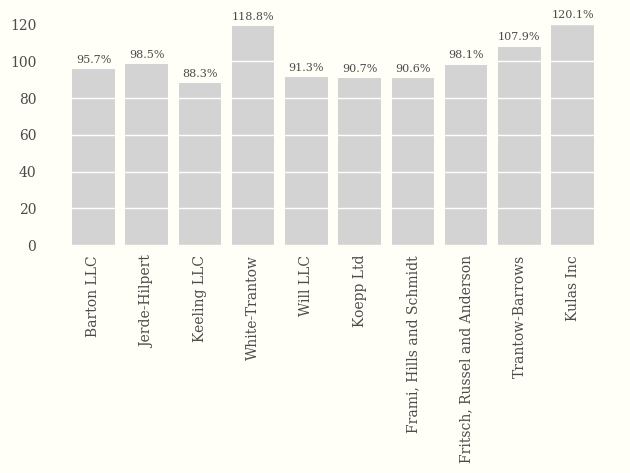

In [6]:
reload(tuftestyledgraphs)

g = (
    tuftestyledgraphs.VerticalBarGraph()
     .add(group_names, group_ratio)
     .rotate_xlabels()
     .show_values(fmt="{:.1f}%", fontsize=8)
     .draw()
)
del g

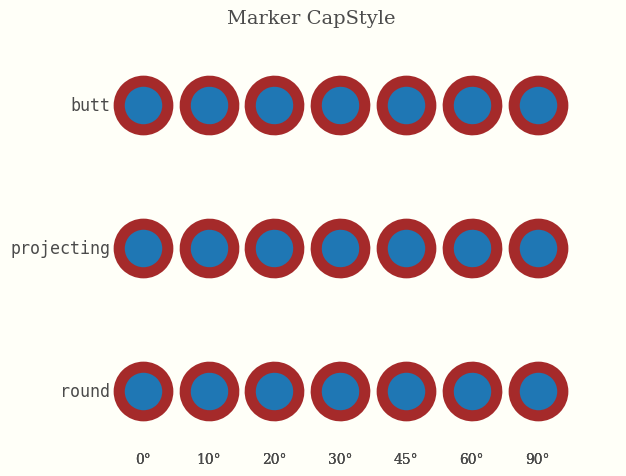

In [21]:
from matplotlib.markers import JoinStyle, CapStyle
from matplotlib.transforms import Affine2D
from matplotlib.markers import MarkerStyle

text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")

marker_inner = dict(markersize=35,
                    markerfacecolor='tab:blue',
                    markerfacecoloralt='lightsteelblue',
                    markeredgecolor='brown',
                    markeredgewidth=8,
                    )

marker_outer = dict(markersize=35,
                    markerfacecolor='tab:blue',
                    markerfacecoloralt='lightsteelblue',
                    markeredgecolor='white',
                    markeredgewidth=1,
                    )

angles = [0, 10, 20, 30, 45, 60, 90]

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

fig, ax = plt.subplots(
fig.suptitle('Marker CapStyle', fontsize=14)
fig.subplots_adjust(left=0.1)

for y, cap_style in enumerate(CapStyle):
    ax.text(-0.5, y, cap_style.name, **text_style)
    for x, theta in enumerate(angles):
        t = Affine2D().rotate_deg(theta)
        m = MarkerStyle('o', transform=t, capstyle=cap_style)
        ax.plot(x, y, marker=m, **marker_inner)
        # ax.plot(x, y, marker=m, **marker_outer)
        ax.text(x, len(CapStyle) - .5, f'{theta}°', ha='center')
format_axes(ax)

plt.show()
# fig.clear()
plt.close()

In [9]:
# def rotate_labels(fig, ax, ratio = 0.8):
#         figw = fig.get_figwidth()
#         nticks = len(ax.xaxis.get_majorticklocs())
#         tick_spacing = figw / float(nticks)
#         font_size = [v.get_fontsize() for v in ax.xaxis.get_majorticklabels()][0]
#         FONT_RATE = 0.01
#         char_width = font_size * FONT_RATE
#         max_labelwidth = (
#             max(len(v.get_text()) for v in ax.xaxis.get_majorticklabels())
#             * char_width
#         )

#         if float(max_labelwidth) / tick_spacing >= ratio:
#             plt.xticks(rotation=90)
         
    

# mpl.rcParams.update(mpl.rcParamsDefault)
# plt.style.use('/Users/warner/dev/tufte-plotter/var/rc/tufte.mplstyle')

# fig, ax = plt.subplots()

# rel_to = group_max / 100
# gd = group_data / rel_to

# # ax.axvline(group_mean / rel_to, ls='--', color='darkgrey', lw=0.8)
# bars = ax.barh(group_names, gd, color="lightgrey", align="center")  #, width=0.5)
# ax.bar_label(bars, fmt="%.1f%%", label_type="edge", fontsize=8, padding=3)#, facecolor="#4B4B4B")
# rotate_labels(fig, ax, 0.23)

# # print_p(bars)

# plt.show()
# plt.close()